# 라이브러리 Import

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import os
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
# -값이 깨지는 문제 해결을 위해 파라미터값 설정    
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [2]:
os.listdir('../data/')

['.ipynb_checkpoints',
 '국내선_노선별_통계_20221121092027.xlsx',
 '국제선_지역별_통계_20221121092121.xlsx',
 '서울시 나눔카 월별 대여량 정보.csv',
 '수입차(승용일반형)+등록.xlsx',
 '연령_및_성별_인구_–_읍면동_연도_끝자리_0_5___시군구_그_외_연도__20221118091820.xlsx',
 '인구_가구_및_주택_–_읍면동_연도_끝자리_0_5___시군구_그_외_연도__20221118091813.xlsx',
 '자동차+단속현황_2010-2021.xlsx',
 '자동차+등록현황(연료별).xlsx',
 '자동차등록_월별__구별__2010-2011.xlsx',
 '자동차등록_월별_구별__2012-2020.xlsx',
 '자전거도로+현황(2013년+이후)_2013-2014.xlsx',
 '자전거도로_현황_2010-2012.xlsx',
 '자전거도로_현황_2015-2020.xlsx',
 '전기차충전소_충전기_정보.csv',
 '주차장_구별__2011-2013.xlsx',
 '주차장_구별__2014-2015.xlsx',
 '주차장_구별__2016-2020.xlsx',
 '지하철수송_2010-2021.xlsx',
 '총인구_2010.xlsx',
 '총인구_2015-2021.xlsx']

# 교통데이터

## 나눔카

In [3]:
car_sharing = pd.read_csv('../data/서울시 나눔카 월별 대여량 정보.csv', encoding='cp949')

In [4]:
car_sharing.info() # 1월, 10월, 11월, 12월에 null 값 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도      10 non-null     int64  
 1   1월      9 non-null      float64
 2   2월      10 non-null     int64  
 3   3월      10 non-null     int64  
 4   4월      10 non-null     int64  
 5   5월      10 non-null     int64  
 6   6월      10 non-null     int64  
 7   7월      10 non-null     int64  
 8   8월      10 non-null     int64  
 9   9월      10 non-null     int64  
 10  10월     9 non-null      float64
 11  11월     9 non-null      float64
 12  12월     9 non-null      float64
dtypes: float64(4), int64(9)
memory usage: 1.1 KB


In [5]:
car_sharing = car_sharing.fillna(0)

In [6]:
car_sharing = car_sharing.astype({'1월' : int, '10월' : int, '11월' : int, '12월' : int})

In [7]:
car_sharing.set_index('년도', inplace=True)

In [8]:
for idx in car_sharing.index: # 각 년도의 대여량을 더해서 null이 아닌 컬럼의 수(월 수)로 나눔
    
    not_zero_col = len([i for i in car_sharing.loc[idx, :] if i != 0])
    sum_of_year = car_sharing.loc[idx, :].sum()
    car_sharing.loc[idx, '평균'] = np.round(sum_of_year/not_zero_col,2)

In [9]:
car_sharing

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,평균
년도,,,,,,,,,,,,,
2022,270374,242852,246371,265587,292568,281721,286820,297856,287093,0,0,0,274582.44
2021,227835,226937,228601,241942,259563,252496,283688,293282,283742,288636,261017,273718,240112.08
2020,215368,205221,215327,215602,247533,231669,252446,259754,224179,256815,241983,255921,217062.92
2019,149026,143691,152561,147678,186355,198542,232004,254203,238874,236344,219810,233368,184035.08
2018,173166,169296,177823,174233,186815,182162,197151,199845,196740,187705,175110,179428,169190.31
2017,182799,170636,183179,179225,185907,181928,202182,205688,199650,201221,185984,189131,174425.38
2016,125474,128515,131557,143842,160921,167879,183148,190979,181884,179830,170492,184630,149934.69
2015,81232,82240,96127,99187,106370,108590,120499,125631,118474,124345,124617,130742,101388.77
2014,28668,31248,40184,41478,52066,54548,61962,72395,70251,80901,83182,86617,54115.38


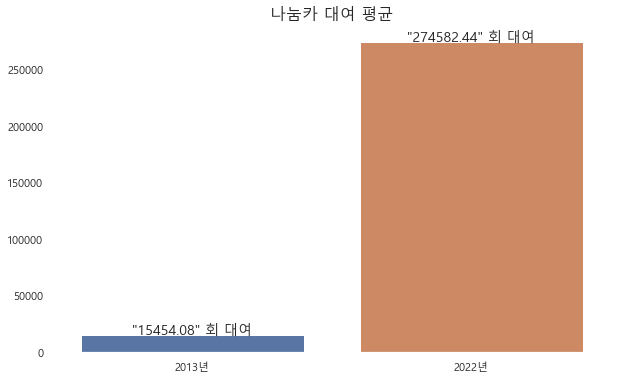

In [11]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.set_facecolor('white')

ax = sns.barplot(x = ['2013년', '2022년'], y = list(car_sharing.loc[[2013, 2022], '평균']))
for i,v in enumerate(list(car_sharing.loc[[2013, 2022], '평균'])):
    plt.text(i, v, f'"{v}" 회 대여', ha='center', fontsize = 14)

plt.title("나눔카 대여 평균", fontsize = 16)
plt.show()

## 자전거 도로

In [12]:
f1 = pd.read_excel('../data/자전거도로_현황_2010-2012.xlsx')
f2 = pd.read_excel('../data/자전거도로_현황_2015-2020.xlsx')
f3 = pd.read_excel('../data/자전거도로+현황(2013년+이후)_2013-2014.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [13]:
# f1.head(20)

In [14]:
# f2.head(20)

In [15]:
f1.head(20)
f1 = f1.iloc[:8, 1:]

In [16]:
f2.head(20)
f2 = f2.iloc[:10, 2:]

In [17]:
f3.head(20)
f3.iloc[:8, :] # kosis 자료와 열린데이터 광장 자료의 차이가 많이나서 보류

,지역별(1),지역별(2),지역별(3),도로별(1),도로별(2),항목,2013,2014
0,합계,소계,소계,계,소계,노선수 (개),365.0,381.0
1,합계,소계,소계,계,소계,길이 (km),707.6,724.6
2,합계,소계,소계,계,자전거 전용도로,노선수 (개),76.0,74.0
3,합계,소계,소계,계,자전거 전용도로,길이 (km),78.1,75.0
4,합계,소계,소계,계,자전거보행자 겸용도로,노선수 (개),250.0,262.0
5,합계,소계,소계,계,자전거보행자 겸용도로,길이 (km),576.7,592.8
6,합계,소계,소계,계,자전거 전용차로,노선수 (개),39.0,46.0
7,합계,소계,소계,계,자전거 전용차로,길이 (km),52.9,56.8


In [18]:
bike_road = pd.concat([f1, f2], axis=1)

In [19]:
bike_road

,분류,구분,2010,2011,2012,자전거도로(1),자전거도로(2)(1),2015,2016,2017,2018,2019,2020
0,계,구간,422.0,399.0,421.0,합계,구간,479.0,540.0,554.0,562.0,590.0,1151.0
1,계,길이,844.64,804.2,665.99,합계,길이,778.8,868.7,888.7,916.0,940.6,1258.8
2,자전거전용도로,구간,93.0,55.0,72.0,자전거전용도로,구간,85.0,87.0,83.0,95.0,100.0,199.0
3,자전거전용도로,길이,230.81,123.3,175.57,자전거전용도로,길이,99.5,104.2,114.0,138.8,148.7,182.7
4,자전거보행자겸용도로,구간,329.0,344.0,307.0,자전거보행자겸용도로,구간,299.0,318.0,322.0,322.0,340.0,687.0
5,자전거보행자겸용도로,길이,613.83,680.9,435.02,자전거보행자겸용도로,길이,577.8,596.6,606.9,611.6,622.0,810.4
6,자전거전용차로,구간,-,-,42.0,자전거전용차로,구간,39.0,39.0,51.0,48.0,53.0,95.0
7,자전거전용차로,길이,-,-,55.4,자전거전용차로,길이,51.8,54.9,54.7,55.0,58.9,74.3
8,NaN,NaN,NaN,NaN,NaN,자전거우선도로,구간,56.0,96.0,98.0,97.0,97.0,170.0
9,NaN,NaN,NaN,NaN,NaN,자전거우선도로,길이,49.7,113.0,113.1,110.6,111.0,191.5


In [20]:
bike_road.drop(columns=['분류', '구분'], inplace=True) # 13-14 데이터 없음 -> 열린광장에는 있을수도 있음

In [21]:
bike_road = bike_road[['자전거도로(1)', '자전거도로(2)(1)', '2010', '2011', '2012', '2015', '2016', '2017', '2018', '2019', '2020']]

**자전거 이용 활성화에 관한 법률 제3조(자전거도로의 구분)**에 따르면</br></br>


1. **자전거 전용도로**: 자전거와 「도로교통법」 제2조제19호의2에 따른 개인형 이동장치(이하 “자전거등”이라 한다)만 통행할 수 있도록 분리대, 경계석(境界石), 그 밖에 이와 유사한 시설물에 의하여 차도 및 보도와 구분하여 설치한 자전거도로</br></br>

2. **자전거ㆍ보행자 겸용도로**: 자전거등 외에 보행자도 통행할 수 있도록 분리대, 경계석, 그 밖에 이와 유사한 시설물에 의하여 차도와 구분하거나 별도로 설치한 자전거도로</br></br>

3. **자전거 전용차로**: 차도의 일정 부분을 자전거등만 통행하도록 차선(車線) 및 안전표지나 노면표시로 다른 차가 통행하는 차로와 구분한 차로</br></br>

4. **자전거 우선도로**: 자동차의 통행량이 대통령령으로 정하는 기준보다 적은 도로의 일부 구간 및 차로를 정하여 자전거등과 다른 차가 상호 안전하게 통행할 수 있도록 도로에 노면표시로 설치한 자전거도로</br></br>

In [22]:
bike_road
year = ['2010', '2011', '2012', '2015', '2016', '2017', '2018', '2019', '2020']
bike_road
bike_road_2 = pd.DataFrame()
for y in ['2011', '2020']:
    print(y)
    _df = bike_road.loc[:, ['자전거도로(1)','자전거도로(2)(1)', y]]
    _df['년도'] = y
    _df.columns = ['도로구분', '구분', '값', '년도']
    bike_road_2 = pd.concat([bike_road_2, _df], axis=0)

2011
2020


In [23]:
bike_road_2 = bike_road_2.replace({'값' :{np.nan : 0, '-': 0}})

In [24]:
bike_road_2.reset_index(drop=True, inplace=True)

In [25]:
bike_road_2
idx_length = [idx for idx in bike_road_2.index if bike_road_2.loc[idx, '구분'] == '길이']
idx_cnt = [idx for idx in bike_road_2.index if bike_road_2.loc[idx, '구분'] == '구간']

In [26]:
bike_road_2.head()

,도로구분,구분,값,년도
0,합계,구간,399.0,2011
1,합계,길이,804.2,2011
2,자전거전용도로,구간,55.0,2011
3,자전거전용도로,길이,123.3,2011
4,자전거보행자겸용도로,구간,344.0,2011


Text(0.5, 1.0, '자전거도로 길이')

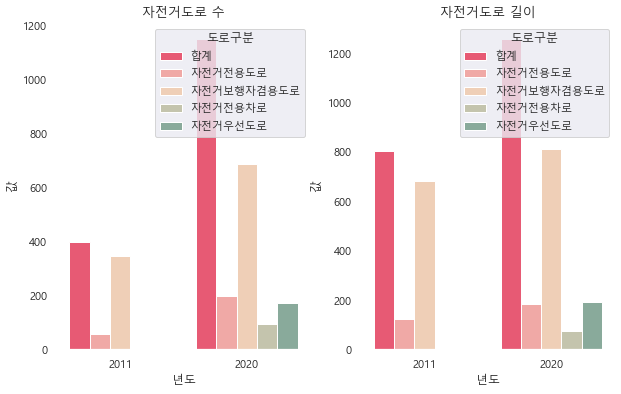

In [29]:
fig, axes = plt.subplots(1,2, figsize = (10,6))

color = ['#FE4365','#FC9D9A','#F9CDAD','#C8C8A9','#83AF9B']


sns.set_palette(palette=color)

axes[0].set_facecolor('white')
data1 = bike_road_2.loc[idx_cnt, :]
# axes[0].set_facecolor('white')
sns.barplot(data = data1, x = '년도', y='값' , hue = '도로구분', ci=None, ax = axes[0])
axes[0].set_title('자전거도로 수', fontsize = 13)

axes[1].set_facecolor('white')
data2 = bike_road_2.loc[idx_length, :]
# axes[1].set_facecolor('white')
sns.barplot(data = data2, x = '년도', y='값' , hue = '도로구분', ci=None, ax = axes[1])
axes[1].set_title('자전거도로 길이', fontsize = 13)
# for i, v in enumerate(bike_road_2.값):
#     plt.text(i,v,v)


## 지하철수송통계 
- 1호선 ~ 9호선, 우이신설선

In [30]:
file = pd.read_excel('../data/지하철수송_2010-2021.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [31]:
col_cnt_people = [col for col in file.columns if '수송인원' in file.loc[0, col]]

In [32]:
col_amount_fee = [col for col in file.columns if '운수수입' in file.loc[0, col]]

In [33]:
# 수송인원
cnt_people = file.loc[:, ['구분별(2)']+col_cnt_people]
# cnt_people.info()
cnt_people = cnt_people.replace({'-' : np.nan})
cnt_people.drop(0, axis=0, inplace=True)
cnt_people = cnt_people.rename(columns={"구분별(2)" : '호선'})

In [34]:
# 운수수입
amount_fee = file.loc[:, ['구분별(2)']+col_amount_fee]
# cnt_people.info()
amount_fee = amount_fee.replace({'-' : np.nan})
amount_fee.drop(0, axis=0, inplace=True)

In [35]:
amount_fee.columns = cnt_people.columns

C:\Users\user\AppData\Local\Temp\ipykernel_10552\2678397991.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


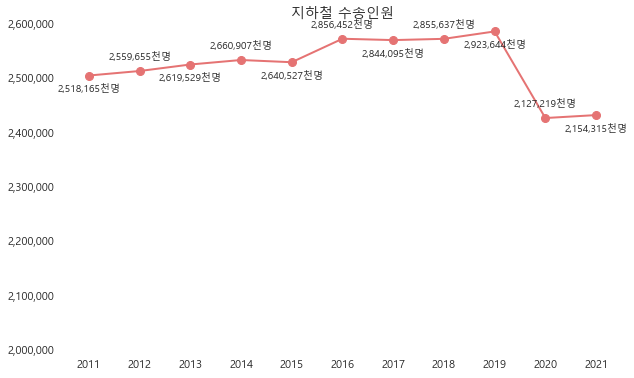

In [39]:
import matplotlib.ticker as mticker
fig, ax = plt.subplots(figsize = (10,6))

ax.set_facecolor('white')
ax = plt.plot(list(cnt_people.columns[2:]),list(cnt_people.iloc[0, 2:]), linewidth = 2, marker = 'o', markersize = 8, color = '#e57373')

label_format = '{:,.0f}'

# current_values = ax.get_yticks()
# ax.xaxis.set_major_locator(mticker.FixedLocator(current_values))
# ax.set_xticklabels([label_format.format(x) for x in current_values])

for i, v in enumerate(list(cnt_people.iloc[0, 2:])):
    if i%2 == 1:
        plt.text(i, v+100000, format(int(v), ',')+'천명', ha = 'center', fontsize = 10)
    else:
        plt.text(i, v-150000, format(int(v), ',')+'천명', ha = 'center', fontsize = 10)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.ylim(0, 3000000)

plt.title('지하철 수송인원', fontsize = 14)
plt.show()

## 등록대수 대비 주차장

### 주차장 수, 면수

In [72]:
f1 = pd.read_excel('../data/주차장_구별__2011-2013.xlsx', sheet_name='데이터') #2011-2013
f2 = pd.read_excel('../data/주차장_구별__2014-2015.xlsx', sheet_name='데이터') #2014, 2015
f3 = pd.read_excel('../data/주차장_구별__2016-2020.xlsx', sheet_name='데이터') #2016-2020

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [73]:
f1['구분'] = f1['자치구(1)'] + ' ' + f1['구분(1).3']
f2['구분'] = f2['자치구(1)'] + ' ' + f2['구분(1).3']
f3['구분'] = f3['자치구(1)'] + ' ' + f3['구분(1)']

In [74]:
f1 = f1.loc[:, ['구분', '2011', '2012', '2013']]
f2 = f2.loc[:, ['2014', '2015']]
f3 = f3.loc[:, ['2016', '2017', '2018', '2019', '2020']]

In [75]:
parking_lot = pd.concat([f1, f2, f3], axis=1)

In [76]:
parking_lot
idx = [idx for idx in parking_lot.index if '면' in parking_lot.loc[idx, '구분']]

In [77]:
parking_lot.loc[idx, :]

,구분,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,서울시 면수,3595750.0,3584262.0,3760460.0,3821527.0,3877326.0,3983291.0,4053875.0,4129723.0,4250682.0,4327614.0
3,종로구 면수,89180.0,90434.0,86308.0,86477.0,86478.0,78985.0,90099.0,94485.0,95350.0,95048.0
5,중구 면수,101128.0,101956.0,106580.0,107330.0,107313.0,102938.0,99538.0,108240.0,107399.0,107738.0
7,용산구 면수,104741.0,105518.0,107448.0,108234.0,110751.0,102472.0,112712.0,113341.0,113591.0,116870.0
9,성동구 면수,105505.0,93662.0,110199.0,117670.0,116675.0,122659.0,123306.0,121228.0,133724.0,133161.0
11,광진구 면수,102960.0,107426.0,109012.0,117023.0,118208.0,118742.0,127454.0,129859.0,138741.0,138795.0
13,동대문구 면수,117687.0,119585.0,120256.0,121844.0,122229.0,128517.0,123174.0,135626.0,138200.0,142300.0
15,중랑구 면수,92859.0,104194.0,109618.0,117063.0,119592.0,120644.0,122128.0,127195.0,133615.0,134695.0
17,성북구 면수,140485.0,142508.0,150535.0,150959.0,149216.0,150343.0,155064.0,155244.0,156915.0,156364.0
19,강북구 면수,80408.0,78292.0,78889.0,83745.0,85446.0,89323.0,88173.0,89173.0,91187.0,92315.0


In [78]:
389358.0 -317181.0

72177.0

In [79]:
parking_lot
idx_cnt = [idx for idx in parking_lot.index if '개소' in parking_lot.loc[idx, '구분']]
idx_cnt2 = [idx for idx in parking_lot.index if '면수' in parking_lot.loc[idx, '구분']]

In [81]:
parking_lot.loc[idx_cnt2, ]

,구분,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,서울시 면수,3595750.0,3584262.0,3760460.0,3821527.0,3877326.0,3983291.0,4053875.0,4129723.0,4250682.0,4327614.0
3,종로구 면수,89180.0,90434.0,86308.0,86477.0,86478.0,78985.0,90099.0,94485.0,95350.0,95048.0
5,중구 면수,101128.0,101956.0,106580.0,107330.0,107313.0,102938.0,99538.0,108240.0,107399.0,107738.0
7,용산구 면수,104741.0,105518.0,107448.0,108234.0,110751.0,102472.0,112712.0,113341.0,113591.0,116870.0
9,성동구 면수,105505.0,93662.0,110199.0,117670.0,116675.0,122659.0,123306.0,121228.0,133724.0,133161.0
11,광진구 면수,102960.0,107426.0,109012.0,117023.0,118208.0,118742.0,127454.0,129859.0,138741.0,138795.0
13,동대문구 면수,117687.0,119585.0,120256.0,121844.0,122229.0,128517.0,123174.0,135626.0,138200.0,142300.0
15,중랑구 면수,92859.0,104194.0,109618.0,117063.0,119592.0,120644.0,122128.0,127195.0,133615.0,134695.0
17,성북구 면수,140485.0,142508.0,150535.0,150959.0,149216.0,150343.0,155064.0,155244.0,156915.0,156364.0
19,강북구 면수,80408.0,78292.0,78889.0,83745.0,85446.0,89323.0,88173.0,89173.0,91187.0,92315.0


### 자동차 등록수

In [82]:
f1 = pd.read_excel('../data/자동차등록_월별__구별__2010-2011.xlsx')
f2 = pd.read_excel('../data/자동차등록_월별_구별__2012-2020.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [83]:
# car_10_11

In [84]:
f1.head(50)
idx_total_cnt = [idx for idx in f1.index if (f1.loc[idx, '구분'] == '계') & (f1.loc[idx, '자동차등록'] == '소계')]

In [85]:
car_10_11 = f1.loc[idx_total_cnt, :]

In [86]:
f2.head(20)
idx_total_cnt2 = [idx for idx in f2.index if (f2.loc[idx, '구분(1)'] == '합계') & (f2.loc[idx, '자동차등록(1)'] == '소계')]

In [87]:
car_12_20 = f2.loc[idx_total_cnt2, :]

In [88]:
car_12_20.set_index('자치구(1)', inplace=True)
car_10_11.set_index('자치구', inplace=True)

In [89]:
car_10_11.loc[['서울시'], :]

,구분,자동차등록,2010,2011
자치구,,,,
서울시,계,소계,2981400.0,2977599.0


In [90]:
car_12_20.loc[['서울시'], :]

,구분(1),자동차등록(1),2012,2013,2014,2015,2016,2017,2018,2019,2020
자치구(1),,,,,,,,,,,
서울시,합계,소계,2969184.0,2973877.0,3013541.0,3056588.0,3083007.0,3116256.0,3124651.0,3124157.0,3157361.0


In [91]:
3157361.0 -2981400.0

175961.0

In [92]:
seoul = car_10_11.loc[['서울시'], '2011':]

In [93]:
seoul2 = car_12_20.loc[['서울시'], '2012':]

In [94]:
cars = pd.concat([seoul.T, seoul2.T], axis = 0)

In [95]:
cars = cars.astype({'서울시' : int})

In [96]:
parks = parking_lot.loc[[1], ].drop(columns = '구분')

In [97]:
parks = parks.T

In [98]:
parks = parks.astype({1 : int})

In [99]:
parks

,1
2011,3595750
2012,3584262
2013,3760460
2014,3821527
2015,3877326
2016,3983291
2017,4053875
2018,4129723
2019,4250682
2020,4327614


### 자동차 등록대수 대비 주차장 수 

In [100]:
car_and_park = pd.concat([cars,  parks], axis=1)

In [101]:
car_and_park.columns = ['등록차량 수', '주차장 면수']

In [102]:
car_and_park['등록대수대비 주차장면수'] = np.round(car_and_park['주차장 면수']/car_and_park['등록차량 수'],2)

In [103]:
car_and_park # 4327614.0

,등록차량 수,주차장 면수,등록대수대비 주차장면수
2011,2977599,3595750,1.21
2012,2969184,3584262,1.21
2013,2973877,3760460,1.26
2014,3013541,3821527,1.27
2015,3056588,3877326,1.27
2016,3083007,3983291,1.29
2017,3116256,4053875,1.30
2018,3124651,4129723,1.32
2019,3124157,4250682,1.36
2020,3157361,4327614,1.37


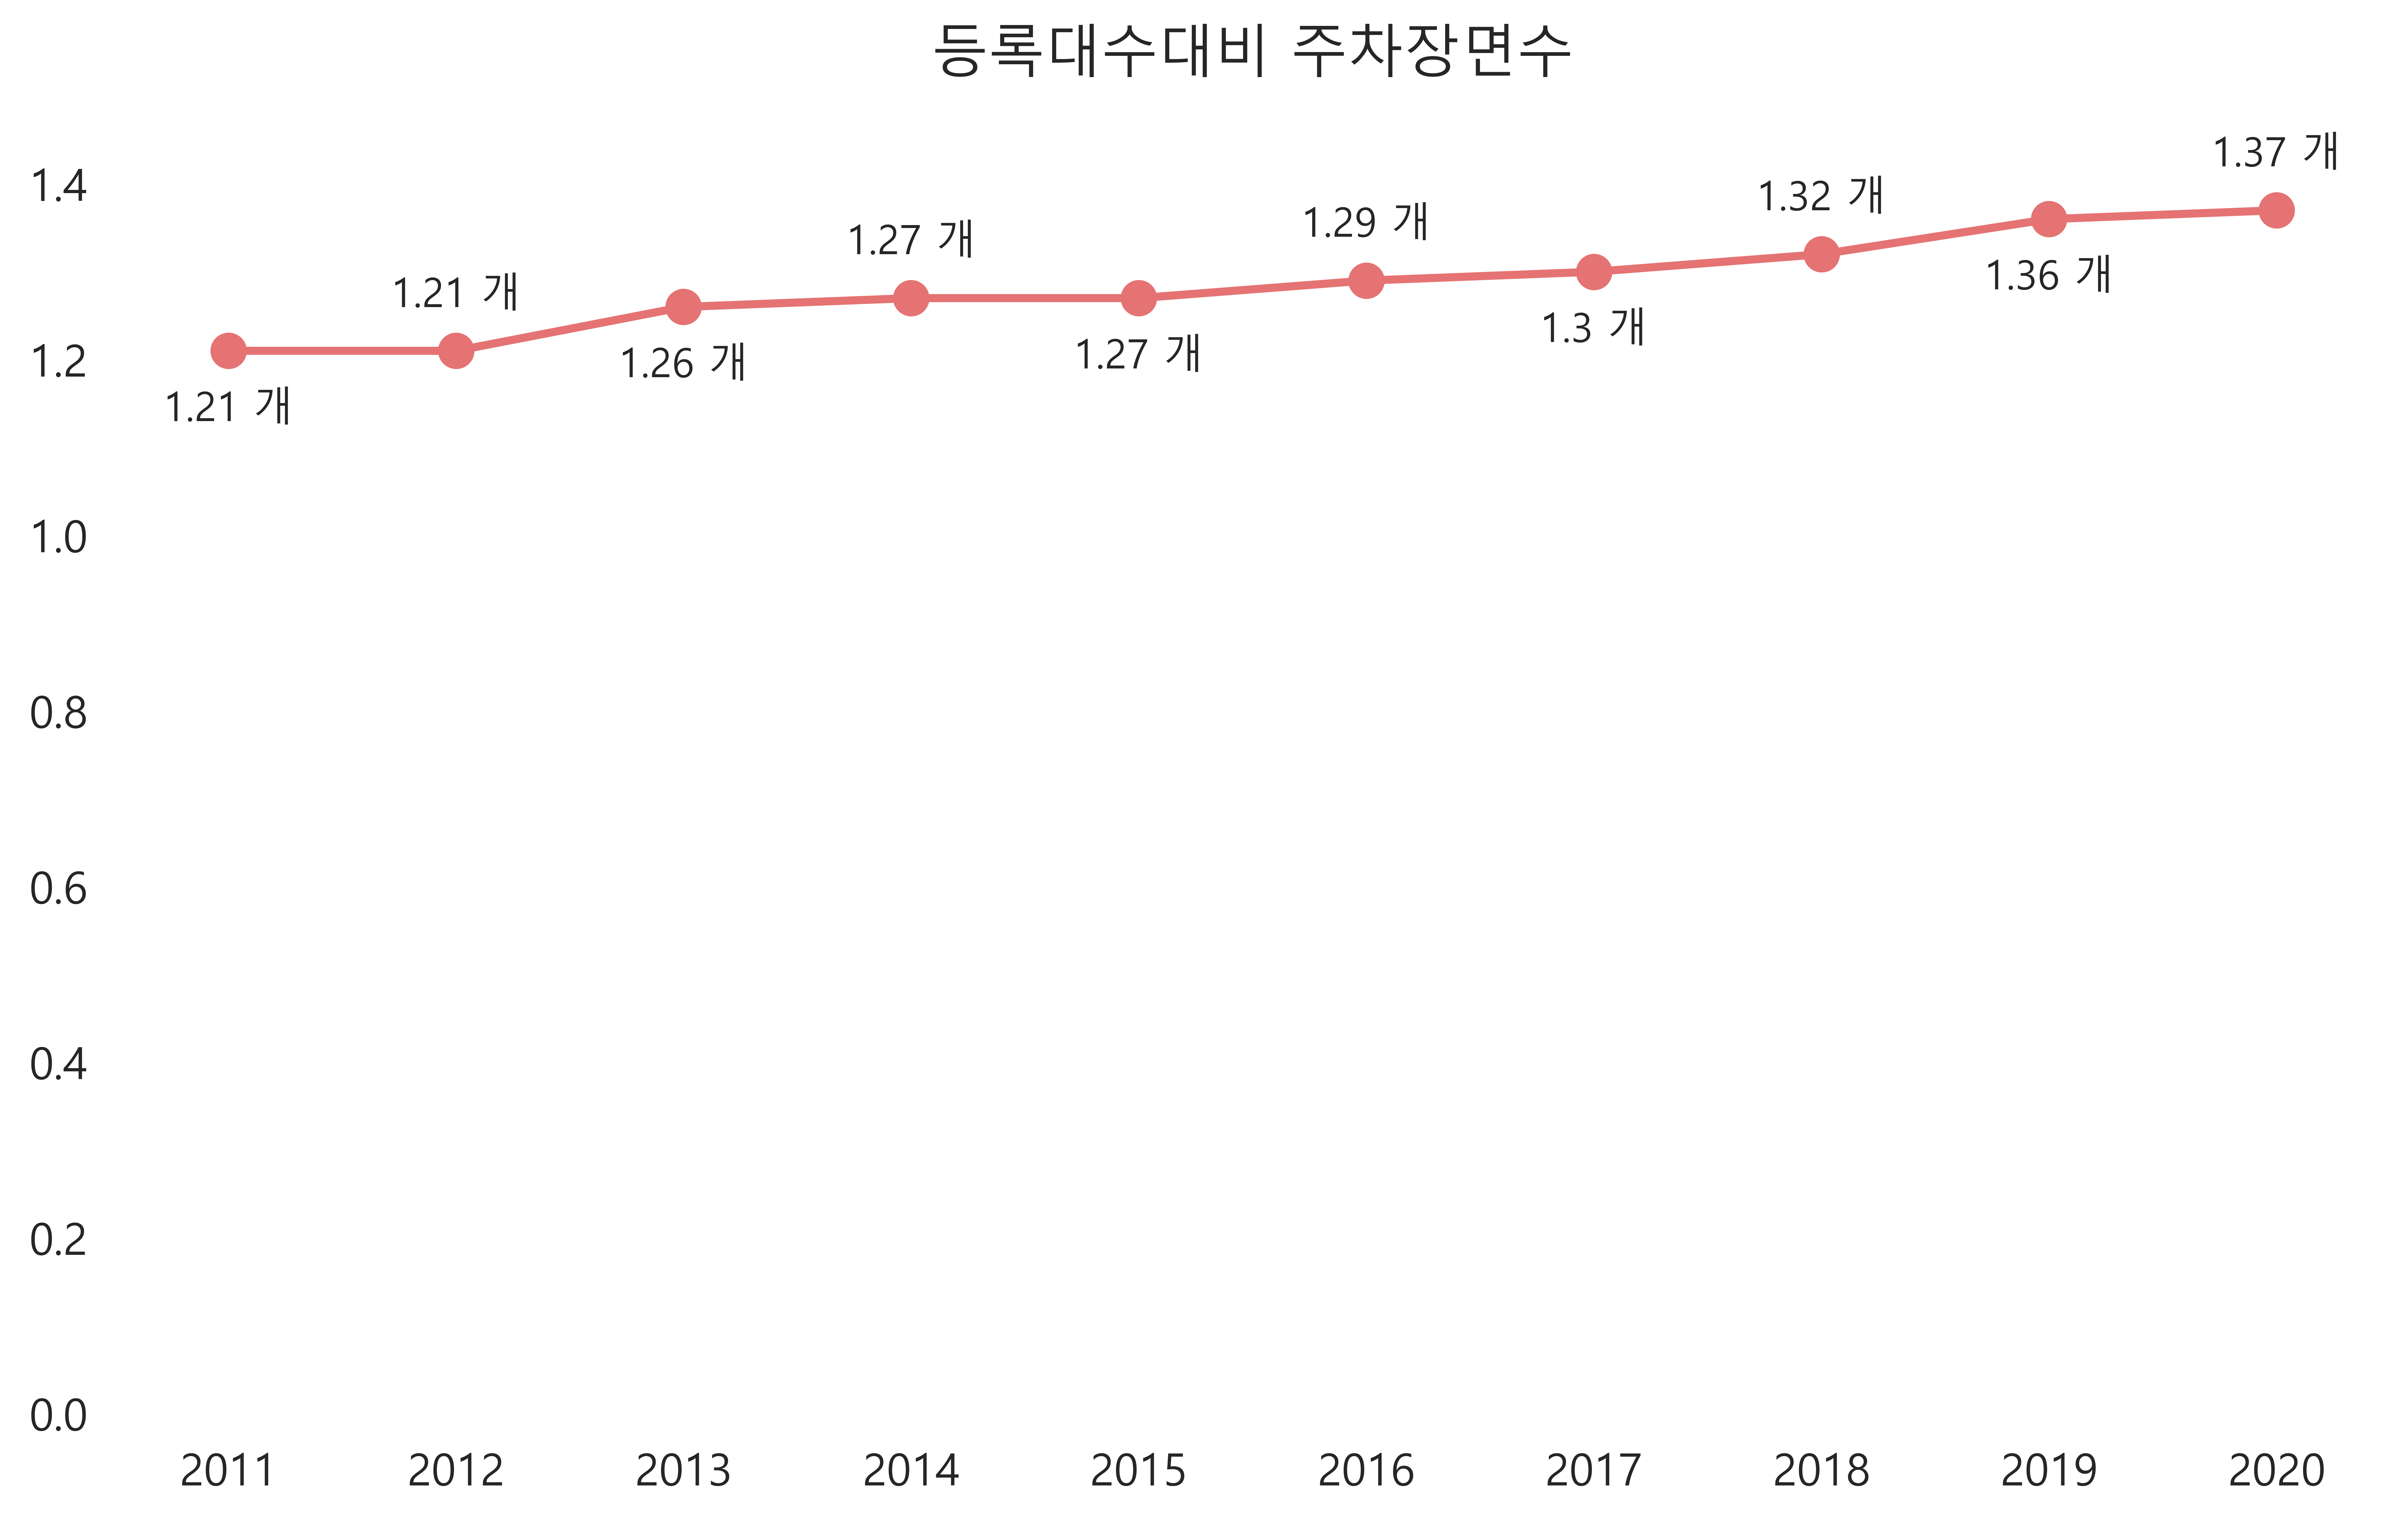

In [106]:
import matplotlib.ticker as mticker
fig, ax = plt.subplots(figsize = (10, 6), dpi = 1000)

ax.set_facecolor('white')
ax = plt.plot(list(car_and_park.index),list(car_and_park['등록대수대비 주차장면수']), linewidth = 2, marker = 'o', markersize = 8, color = '#e57373')

for i, v in enumerate(list(car_and_park['등록대수대비 주차장면수'])):
    if i%2 == 1:
        plt.text(i, v+0.05, f'{v} 개', ha = 'center', fontsize = 10)
    else : 
        plt.text(i, v-0.08, f'{v} 개', ha = 'center', fontsize = 10)


plt.ylim(0, 1.5)
plt.title('등록대수대비 주차장면수', fontsize = 14)
plt.show()

## 서울시 인당 자동차 등록대수

In [109]:
seoul = car_10_11.loc[['서울시'], '2010':]
seoul2 = car_12_20.loc[['서울시'], '2012':]
cars = pd.concat([seoul.T, seoul2.T], axis = 0)
cars = cars.astype({'서울시' : int})

In [110]:
cars

,서울시
2010,2981400
2011,2977599
2012,2969184
2013,2973877
2014,3013541
2015,3056588
2016,3083007
2017,3116256
2018,3124651
2019,3124157


In [111]:
cars.head() # 자동차등록수

,서울시
2010,2981400
2011,2977599
2012,2969184
2013,2973877
2014,3013541


In [112]:
f_2010 = pd.read_excel('../data/총인구_2010.xlsx')
f_15_21 = pd.read_excel('../data/총인구_2015-2021.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [113]:
f_2010.drop(columns='행정구역별(읍면동)', inplace=True)
f_2010.drop(0, axis=0, inplace=True)

In [114]:
f_2010 = f_2010.T

In [115]:
population = f_15_21.T
population.drop(columns=0, inplace=True)
population.drop('행정구역별(읍면동)', inplace=True)

In [116]:
population = pd.concat([f_2010, population], axis=0)

In [117]:
population.columns = ['서울시 총인구']

In [118]:
population.index[:-1] # 총인구데이터에 공백이 있어서 총인구 데이터가 있는 해에 자동차 등록대수 맞추기

Index(['2010', '2015', '2016', '2017', '2018', '2019', '2020'], dtype='object')

In [120]:
population

,서울시 총인구
2010,9794304.0
2015,9904312.0
2016,9805506.0
2017,9741871.0
2018,9673936.0
2019,9639541.0
2020,9586195.0
2021,9472127.0


In [128]:
cars2 = cars.loc[list(population.index[:-1]), :]

In [130]:
# cars2

In [122]:
car_and_pop = pd.concat([population, cars2], axis=1)

In [123]:
car_and_pop.drop('2021', axis=0, inplace=True)

In [124]:
car_and_pop.columns = ['총인구', '등록차량수']

In [125]:
car_and_pop['인당 자동차 수'] = car_and_pop['등록차량수']/car_and_pop['총인구']

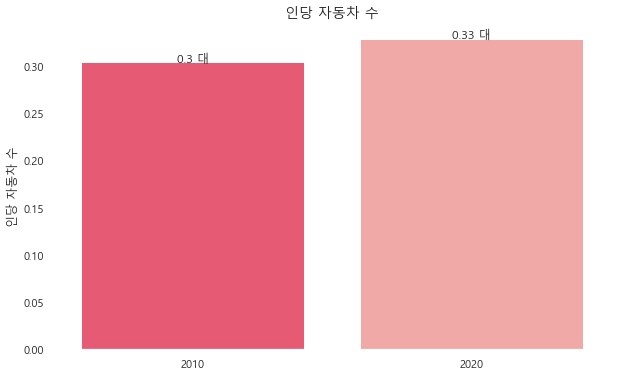

In [127]:
fig, ax = plt.subplots(figsize = (10, 6))

# year = ['2010', '2019', '2020']

year = ['2010', '2020']
ax.set_facecolor('white')

ax = sns.barplot(x = year, y = car_and_pop.loc[year, '인당 자동차 수'])

for i, v in enumerate(car_and_pop.loc[year, '인당 자동차 수']):
    plt.text(i,v, f'{np.round(v,2)} 대', ha = 'center')
    
plt.title('인당 자동차 수', fontsize = 14)
plt.show()

## 자동차 단속현황

In [131]:
file = pd.read_excel('../data/자동차+단속현황_2010-2021.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [132]:
file['현황별(1)'].unique()

array(['건수', '위반사항', '차종별', '용도별', '처리상황'], dtype=object)

In [133]:
file # 불법영업 및 정비불량 다시 check

,현황별(1),현황별(2),2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,건수,소계,1616726.0,1140876.0,903294.0,1264436.0,1867130.0,2426357.0,2832342.0,3562576.0,2599624.0,2492446.0,2334843.0,1841080.0
1,위반사항,중앙선침범,38599.0,21406.0,15153.0,28489.0,50151.0,62273.0,63233.0,60231.0,45782.0,43015.0,43225.0,12189.0
2,위반사항,속도,726056.0,435438.0,414003.0,490629.0,812988.0,660997.0,636317.0,1592426.0,1317955.0,1106086.0,1044103.0,1147444.0
3,위반사항,추월,13.0,55.0,31.0,68.0,30.0,50.0,63.0,221.0,176.0,94.0,121.0,456.0
4,위반사항,회전,5835.0,4094.0,2362.0,3313.0,3659.0,8514.0,16808.0,14465.0,7747.0,6123.0,4340.0,5227.0
5,위반사항,음주운전,35390.0,41780.0,35103.0,39038.0,27324.0,24979.0,25287.0,23037.0,18488.0,14330.0,13312.0,14163.0
6,위반사항,무면허,10750.0,8574.0,6546.0,7993.0,7867.0,8312.0,8498.0,7298.0,6166.0,5425.0,4773.0,7271.0
7,위반사항,차로위반,3363.0,5755.0,1190.0,8511.0,21578.0,16471.0,39942.0,42349.0,33131.0,20447.0,3713.0,11196.0
8,위반사항,신호위반,353560.0,263768.0,238405.0,311911.0,521365.0,650140.0,684801.0,679646.0,527831.0,522829.0,315557.0,310183.0
9,위반사항,정원초과,17.0,41.0,9.0,37.0,10.0,23.0,24.0,50.0,22.0,18.0,10.0,197.0


In [134]:
idx_breach = [idx for idx in file.index if file.loc[idx, '현황별(1)'] == '위반사항']

In [135]:
breach = file.loc[[0]+idx_breach, :]

In [136]:
breach = breach.replace({'-' : 0}) # null 값은 우선 0으로 처리

In [137]:
breach.drop(columns=['현황별(1)', '2010'], inplace=True)

In [138]:
breach.set_index('현황별(2)', inplace=True)

In [139]:
# breach

In [140]:
top6 = list(breach.sort_values('2011', ascending=False).head(6).index)
top6
top6.index('안전띠미착용')

4

In [142]:
top6

['소계', '속도', '기타', '신호위반', '안전띠미착용', '음주운전']

C:\Users\user\AppData\Local\Temp\ipykernel_10552\1945003674.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


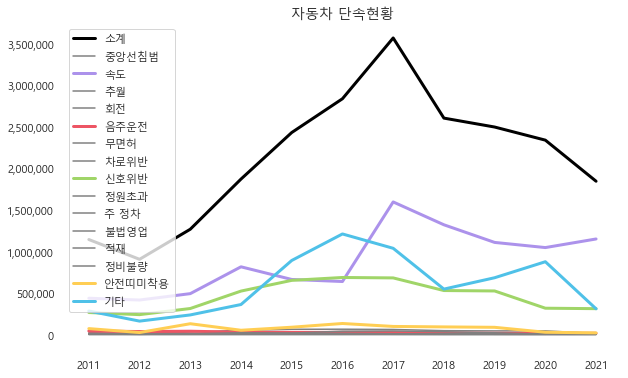

In [141]:
fig, ax = plt.subplots(figsize = (10, 6))

idxs = breach.index

top_color = ['#000000', '#AC92EB', '#4FC1E8', '#A0D568', '#FFCE54', '#ED5564']

ax.set_facecolor('white')
for idx in idxs:
    if idx in top6:
        ax = plt.plot(list(breach.columns), breach.loc[idx, :], label = idx, linewidth = 3, color = top_color[top6.index(idx)])
    else :
        ax = plt.plot(list(breach.columns), breach.loc[idx, :], label = idx, color='gray')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('자동차 단속현황', fontsize = 14)
plt.legend(facecolor = 'white')
plt.show()